In [1]:
import pandas as pd

raw_data = pd.read_csv('./data/CARD_SUBWAY_MONTH_202108.csv', index_col=False)
raw_data.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20210801,중앙선,회기,10269,10305,20210804
1,20210801,일산선,마두,2306,2354,20210804
2,20210801,일산선,정발산,3334,3307,20210804
3,20210801,일산선,주엽,3047,3044,20210804
4,20210801,일산선,대화,4520,4151,20210804


In [2]:
import numpy as np

lane_data = pd.pivot_table(data=raw_data, index='노선명', 
                           values=['승차총승객수', '하차총승객수'],
                           aggfunc=np.sum)
lane_data

,승차총승객수,하차총승객수
노선명,,
1호선,4930790,4809891
2호선,29827011,30050336
3호선,11399211,11346523
4호선,10701190,10764499
5호선,14125719,14070037
6호선,7320539,7213500
7호선,15582172,15384310
8호선,4158786,4202589
9호선,6066566,6159524


In [3]:
lane_data['승하차승객차이'] = np.abs(lane_data['승차총승객수'] - lane_data['하차총승객수'])
lane_data

,승차총승객수,하차총승객수,승하차승객차이
노선명,,,
1호선,4930790,4809891,120899
2호선,29827011,30050336,223325
3호선,11399211,11346523,52688
4호선,10701190,10764499,63309
5호선,14125719,14070037,55682
6호선,7320539,7213500,107039
7호선,15582172,15384310,197862
8호선,4158786,4202589,43803
9호선,6066566,6159524,92958


In [4]:
lane_data.sort_values(by='승하차승객차이', ascending=False).head()

,승차총승객수,하차총승객수,승하차승객차이
노선명,,,
분당선,8079076,8333771,254695
2호선,29827011,30050336,223325
7호선,15582172,15384310,197862
공항철도 1호선,2224849,2040579,184270
1호선,4930790,4809891,120899


In [5]:
lane_data.sort_values(by='승차총승객수', ascending=False).head()

,승차총승객수,하차총승객수,승하차승객차이
노선명,,,
2호선,29827011,30050336,223325
7호선,15582172,15384310,197862
5호선,14125719,14070037,55682
3호선,11399211,11346523,52688
4호선,10701190,10764499,63309


In [6]:
station_data = pd.pivot_table(data=raw_data, index='역명', 
                               values=['승차총승객수', '하차총승객수'],
                               aggfunc=np.sum)
station_data

,승차총승객수,하차총승객수
역명,,
4.19민주묘지,70507,65925
가능,161898,156084
가락시장,376994,390942
가산디지털단지,1355697,1412051
가양,467975,456605
...,...,...
회기,560588,547771
회룡,298956,296989
회현(남대문시장),502516,526925


In [7]:
station_data.sort_values(by='승차총승객수', ascending=False).head()

,승차총승객수,하차총승객수
역명,,
강남,1874711,1819150
잠실(송파구청),1865925,1886470
고속터미널,1660283,1640472
서울역,1572730,1541382
홍대입구,1525530,1553713


In [8]:
station_data = pd.pivot_table(data=raw_data, index='역명', 
                               values=['승차총승객수', '하차총승객수'],
                               aggfunc=[np.sum, np.mean, np.std])
station_data

sum                   mean                         std  \
            승차총승객수   하차총승객수        승차총승객수        하차총승객수        승차총승객수   
역명                                                                      
4.19민주묘지     70507    65925   2274.419355   2126.612903    373.593877   
가능          161898   156084   5222.516129   5034.967742   1134.607124   
가락시장        376994   390942   6080.548387   6305.516129   1939.749956   
가산디지털단지    1355697  1412051  21866.080645  22775.016129  15270.379943   
가양          467975   456605  15095.967742  14729.193548   4373.801127   
...            ...      ...           ...           ...           ...   
회기          560588   547771  18083.483871  17670.032258   3766.352204   
회룡          298956   296989   9643.741935   9580.290323   2208.369307   
회현(남대문시장)   502516   526925  16210.193548  16997.580645   5413.747269   
효창공원앞       223199   216659   3599.983871   3494.500000   1901.070341   
흑석(중앙대입구)   174931   183305   5642.935484   5913.064516   1563.297241   

                         
                 하차총승객수  
역명                       
4.19민주묘지     410.761705  
가능          1121.264033  
가락시장        1849.094894  
가산디지털단지    14499.365939  
가양          4240.535174  
...                 ...  
회기          3625.268335  
회룡          2207.006966  
회현(남대문시장)   5673.240266  
효창공원앞       1539.828868  
흑석(중앙대입구)   1679.679690  

[520 rows x 6 columns]

In [9]:
station_data.columns = ['총승차', '총하차', '일평균승차', '일평균하차', '승차표준편차', '하차표준편차']
station_data.head()

,총승차,총하차,일평균승차,일평균하차,승차표준편차,하차표준편차
역명,,,,,,
4.19민주묘지,70507,65925,2274.419355,2126.612903,373.593877,410.761705
가능,161898,156084,5222.516129,5034.967742,1134.607124,1121.264033
가락시장,376994,390942,6080.548387,6305.516129,1939.749956,1849.094894
가산디지털단지,1355697,1412051,21866.080645,22775.016129,15270.379943,14499.365939
가양,467975,456605,15095.967742,14729.193548,4373.801127,4240.535174


In [10]:
station_data.sort_values(by='총승차', ascending=False).head()

,총승차,총하차,일평균승차,일평균하차,승차표준편차,하차표준편차
역명,,,,,,
강남,1874711,1819150,60474.548387,58682.258065,18723.322383,18262.922793
잠실(송파구청),1865925,1886470,30095.564516,30426.935484,20723.699517,19816.862422
고속터미널,1660283,1640472,17852.505376,17639.483871,10305.355931,9924.724468
서울역,1572730,1541382,9891.383648,9694.226415,10756.755773,10541.777127
홍대입구,1525530,1553713,16058.210526,16354.873684,17306.631205,17690.730638


In [11]:
station_data.sort_values(by='승차표준편차', ascending=False).head()

,총승차,총하차,일평균승차,일평균하차,승차표준편차,하차표준편차
역명,,,,,,
잠실(송파구청),1865925,1886470,30095.564516,30426.935484,20723.699517,19816.862422
선릉,1461878,1458286,23578.677419,23520.741935,19241.780971,15615.806441
강남,1874711,1819150,60474.548387,58682.258065,18723.322383,18262.922793
신도림,1202149,1174705,19389.500000,18946.854839,17691.419244,17096.513503
홍대입구,1525530,1553713,16058.210526,16354.873684,17306.631205,17690.730638


In [12]:
station_data.sort_values(by='승차표준편차', ascending=True).head(10)

,총승차,총하차,일평균승차,일평균하차,승차표준편차,하차표준편차
역명,,,,,,
지평,1852,2019,59.741935,65.129032,14.059321,12.914441
달월,2282,1577,73.612903,50.870968,23.931398,9.433069
임진강,912,686,29.419355,22.129032,25.718702,22.685887
세종대왕릉,7758,7768,250.258065,250.580645,27.029574,32.417870
오빈,7963,7851,256.870968,253.258065,31.290831,37.001773
원덕,9789,9051,315.774194,291.967742,31.410943,36.381757
백양리,4068,3495,131.225806,112.741935,33.982064,28.904403
굴봉산,4936,4416,159.225806,142.451613,37.863535,33.719271
신원,5910,4734,190.645161,152.709677,40.725543,22.803791


In [13]:
gangnam = raw_data[raw_data['역명']=='강남']
gangnam

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
535,20210801,2호선,강남,22794,21657,20210804
1172,20210802,2호선,강남,70147,68166,20210805
1271,20210803,2호선,강남,70995,68779,20210806
1981,20210804,2호선,강남,70275,68322,20210807
2477,20210805,2호선,강남,70718,68542,20210808
3006,20210806,2호선,강남,72165,69679,20210809
3676,20210807,2호선,강남,44891,43388,20210810
4339,20210808,2호선,강남,24489,23435,20210811
5318,20210809,2호선,강남,73489,71365,20210812
5947,20210810,2호선,강남,74307,72076,20210813


In [14]:
gangnam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 535 to 18087
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    31 non-null     int64 
 1   노선명     31 non-null     object
 2   역명      31 non-null     object
 3   승차총승객수  31 non-null     int64 
 4   하차총승객수  31 non-null     int64 
 5   등록일자    31 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.7+ KB


In [15]:
gangnam['사용일자'] = pd.to_datetime(gangnam['사용일자'], format='%Y%m%d')
gangnam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 535 to 18087
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   사용일자    31 non-null     datetime64[ns]
 1   노선명     31 non-null     object        
 2   역명      31 non-null     object        
 3   승차총승객수  31 non-null     int64         
 4   하차총승객수  31 non-null     int64         
 5   등록일자    31 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 1.7+ KB


C:\Users\gigic\AppData\Local\Temp/ipykernel_28632/1578034818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gangnam['사용일자'] = pd.to_datetime(gangnam['사용일자'], format='%Y%m%d')


In [21]:
import platform
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangul OK in your MAC!!!")
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    print("Hangul OK in your Windows!!!")
    rc("font", family=font_name)
else:
    print("Unknown system.. sorry~~~")
    
plt.rcParams["axes.unicode_minus"] = False 

Hangul OK in your Windows!!!


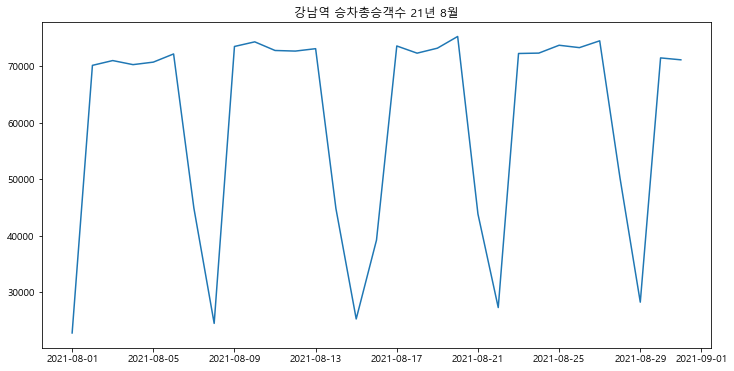

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(gangnam['사용일자'], gangnam['승차총승객수'])
plt.title('강남역 승차총승객수 21년 8월')
plt.show()

In [23]:
paldang = raw_data[raw_data['역명']=='팔당']
paldang['사용일자'] = pd.to_datetime(paldang['사용일자'], format='%Y%m%d')
paldang.head()

C:\Users\gigic\AppData\Local\Temp/ipykernel_28632/4030036722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paldang['사용일자'] = pd.to_datetime(paldang['사용일자'], format='%Y%m%d')


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
590,2021-08-01,중앙선,팔당,978,928,20210804
623,2021-08-02,중앙선,팔당,758,753,20210805
1214,2021-08-03,중앙선,팔당,838,792,20210806
1928,2021-08-04,중앙선,팔당,779,801,20210807
2432,2021-08-05,중앙선,팔당,848,827,20210808


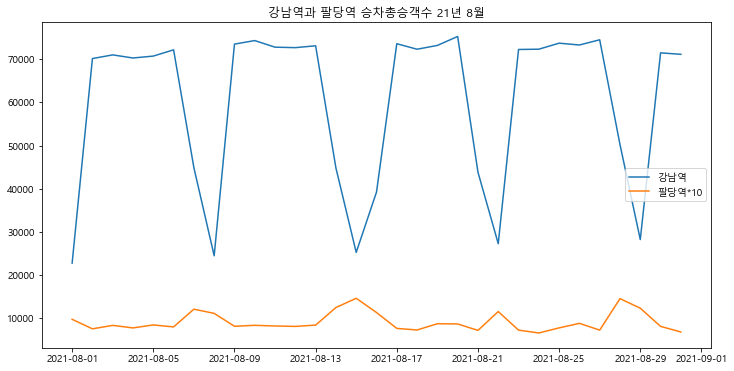

In [24]:
plt.figure(figsize=(12,6))
plt.plot(gangnam['사용일자'], gangnam['승차총승객수'], label='강남역')
plt.plot(paldang['사용일자'], paldang['승차총승객수']*10, label='팔당역*10')
plt.title('강남역과 팔당역 승차총승객수 21년 8월')
plt.legend()
plt.show()